* Q1: Write a code to implement the three versions of the gradient descent
namely. vanilla gradient descent, mini batch gradient descent and stochastic
gradient descent for a data set consisting of at least 1500 rows and 15
columns. Write the necessary theory and experiment on the convergence
using the optimal batch size for the mini batch method.

In [10]:
import numpy as np

# Define the Mean Squared Error cost function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Generate random dataset (replace this with your actual dataset)
np.random.seed(0)
X = np.random.rand(1500, 15)
y = np.random.rand(1500)

# Define hyperparameters
learning_rate = 0.01
num_iterations = 10
batch_size = 32  # Adjust the batch size for mini-batch GD

# Initialize model parameters
theta = np.random.rand(15)

# Lists to store cost values for each variant
cost_history_vanilla = []
cost_history_mini_batch = []
cost_history_stochastic = []

# Gradient Descent variants
for i in range(num_iterations):
    # Shuffle the dataset for SGD and Mini-Batch GD (not needed for Vanilla GD)
    permutation = np.random.permutation(len(X))
    X = X[permutation]
    y = y[permutation]

    # Vanilla Gradient Descent
    gradient_vanilla = (1.0 / len(X)) * np.dot(X.T, (np.dot(X, theta) - y))
    theta -= learning_rate * gradient_vanilla
    cost_vanilla = mean_squared_error(y, np.dot(X, theta))
    cost_history_vanilla.append(cost_vanilla)

    # Mini-Batch Gradient Descent
    for j in range(0, len(X), batch_size):
        X_mini_batch = X[j:j+batch_size]
        y_mini_batch = y[j:j+batch_size]
        gradient_mini_batch = (1.0 / batch_size) * np.dot(X_mini_batch.T, (np.dot(X_mini_batch, theta) - y_mini_batch))
        theta -= learning_rate * gradient_mini_batch
    cost_mini_batch = mean_squared_error(y, np.dot(X, theta))
    cost_history_mini_batch.append(cost_mini_batch)

    # Stochastic Gradient Descent
    random_index = np.random.randint(0, len(X))
    X_stochastic = X[random_index]
    y_stochastic = y[random_index]
    gradient_stochastic = np.dot(X_stochastic.T, (np.dot(X_stochastic, theta) - y_stochastic))
    theta -= learning_rate * gradient_stochastic
    cost_stochastic = mean_squared_error(y, np.dot(X, theta))
    cost_history_stochastic.append(cost_stochastic)

# Experiment: Monitor the convergence by tracking the cost function value
# at each iteration and plotting it.

# You can use a library like Matplotlib to create a plot of the cost values.

# Analyze and compare the convergence of the three methods.


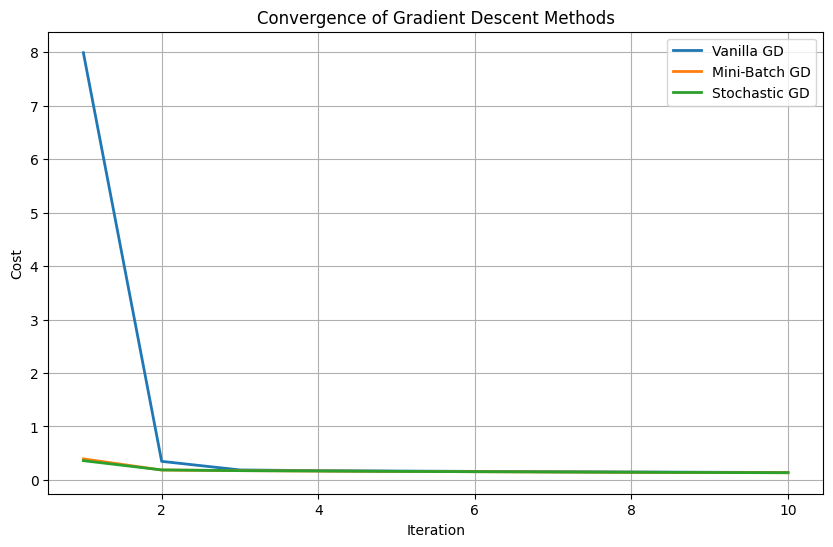

In [11]:
import matplotlib.pyplot as plt

# Assuming you have the cost_history lists for all three methods
# cost_history_vanilla, cost_history_mini_batch, cost_history_stochastic

# Create a list of iteration numbers (e.g., 1, 2, 3, ..., num_iterations)
iterations = list(range(1, num_iterations + 1))

# Plot the cost values for each method
plt.figure(figsize=(10, 6))
plt.plot(iterations, cost_history_vanilla, label='Vanilla GD', linewidth=2)
plt.plot(iterations, cost_history_mini_batch, label='Mini-Batch GD', linewidth=2)
plt.plot(iterations, cost_history_stochastic, label='Stochastic GD', linewidth=2)

# Customize the plot
plt.title('Convergence of Gradient Descent Methods')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


[-0.00106929 -0.02519481 -0.00795977 -0.00859928 -0.00392829  0.01534231
  0.00490716 -0.00974932  0.00236454  0.02058126  0.00847588  0.03416026
  0.02201366 -0.02195977  0.01496772]


ValueError: x and y must have same first dimension, but have shapes (100,) and (150000,)

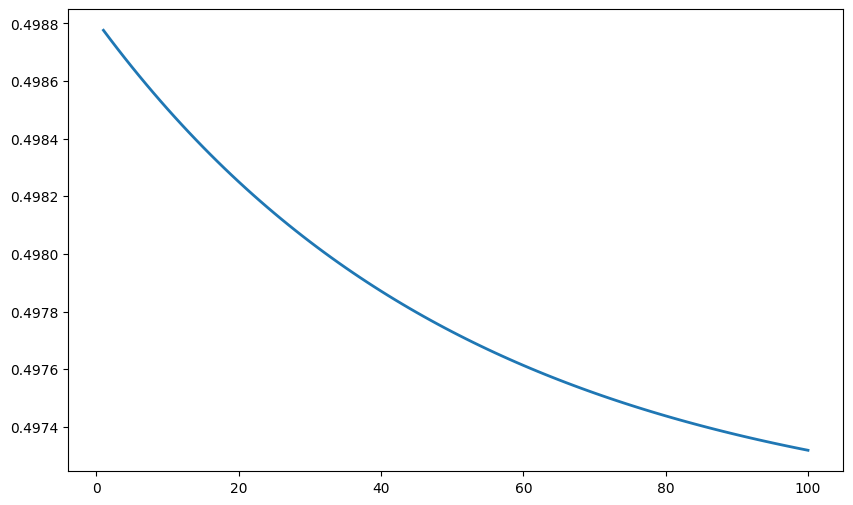

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define your dataset (replace with your actual dataset)
# For this example, let's generate a random dataset with 1500 rows and 15 columns
np.random.seed(0)
num_samples = 1500
num_features = 15
X = np.random.randn(num_samples, num_features)
y = np.random.randn(num_samples)

# Define hyperparameters
learning_rate = 0.01
num_epochs = 100  # Adjust the number of epochs as needed
batch_size = 32  # Adjust the batch size as needed

# Initialize the weights (theta) with zeros
theta = np.zeros(num_features)

# Lists to store cost values for each method
cost_history_vanilla = []
cost_history_mini_batch = []
cost_history_stochastic = []

# Vanilla Gradient Descent
def vanilla_gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    for epoch in range(num_epochs):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradient
        cost = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
        cost_history_vanilla.append(cost)
    return theta

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_epochs, batch_size):
    m = len(y)
    for epoch in range(num_epochs):
        # Shuffle the dataset
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            gradient = (1/batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradient
            cost = (1/(2*m)) * np.sum((X_batch.dot(theta) - y_batch)**2)
            cost_history_mini_batch.append(cost)
    return theta

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    for epoch in range(num_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            
            gradient = X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradient
            cost = (1/2) * np.sum((X_i.dot(theta) - y_i)**2)
            cost_history_stochastic.append(cost)
    return theta

# Call the gradient descent functions to train the model
trained_theta_vanilla = vanilla_gradient_descent(X, y, theta.copy(), learning_rate, num_epochs)
trained_theta_mini_batch = mini_batch_gradient_descent(X, y, theta.copy(), learning_rate, num_epochs, batch_size)
trained_theta_stochastic = stochastic_gradient_descent(X, y, theta.copy(), learning_rate, num_epochs)

print(trained_theta_mini_batch)

# Create an array of iterations
iterations = np.arange(1, num_epochs+1)

# Plot the cost functions over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, cost_history_vanilla, label='Vanilla GD', linewidth=2)
#plt.plot(iterations, cost_history_mini_batch, label='Mini-Batch GD', linewidth=2)
plt.plot(iterations, cost_history_stochastic, label='Stochastic GD', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Convergence Comparison of Gradient Descent Methods')
plt.legend()
plt.grid(True)
plt.show()


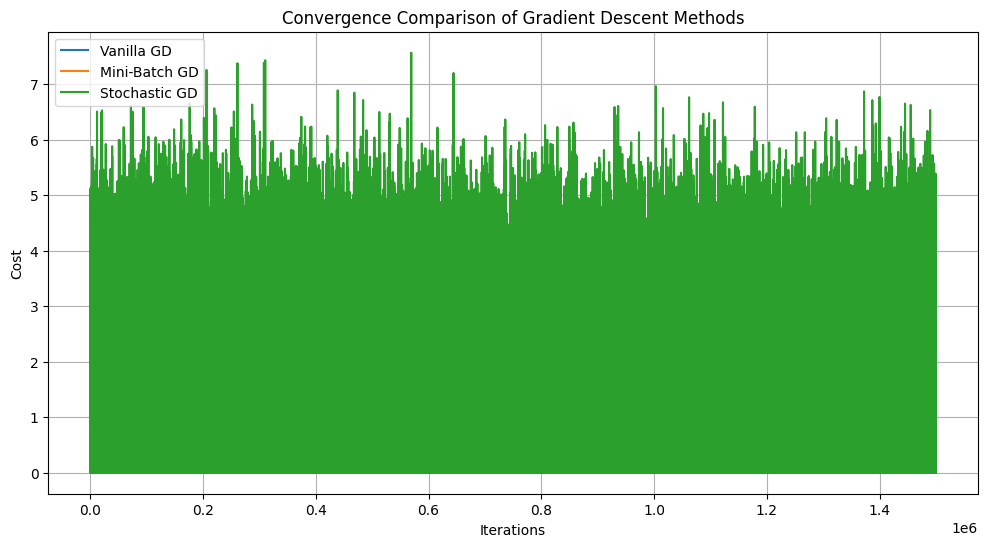

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define your dataset (replace with your actual dataset)
# For this example, let's generate a random dataset with 1500 rows and 15 columns
np.random.seed(0)
num_samples = 1500
num_features = 15
X = np.random.randn(num_samples, num_features)
y = np.random.randn(num_samples)

# Define hyperparameters
learning_rate = 0.01
num_epochs = 1000  # You can adjust this based on your convergence criteria
batch_size = 32  # Adjust the batch size as needed

# Initialize the weights (theta) with zeros
theta = np.zeros(num_features)

# Lists to store cost values for each method
cost_vanilla = []
cost_mini_batch = []
cost_stochastic = []

# Vanilla Gradient Descent
def vanilla_gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    for epoch in range(num_epochs):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradient
        
        # Calculate and store the cost for this iteration
        cost = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
        cost_vanilla.append(cost)
    return theta

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_epochs, batch_size):
    m = len(y)
    for epoch in range(num_epochs):
        # Shuffle the dataset
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            gradient = (1/batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradient
            
            # Calculate and store the cost for this iteration
            cost = (1/(2*batch_size)) * np.sum((X_batch.dot(theta) - y_batch)**2)
            cost_mini_batch.append(cost)
    return theta

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    for epoch in range(num_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            
            gradient = X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradient
            
            # Calculate and store the cost for this iteration
            cost = (1/2) * np.sum((X_i.dot(theta) - y_i)**2)
            cost_stochastic.append(cost)
    return theta

# Call the gradient descent functions to train the model and store cost values
# Replace with your actual training data and labels
trained_theta_vanilla = vanilla_gradient_descent(X, y, theta.copy(), learning_rate, num_epochs)
trained_theta_mini_batch = mini_batch_gradient_descent(X, y, theta.copy(), learning_rate, num_epochs, batch_size)
trained_theta_stochastic = stochastic_gradient_descent(X, y, theta.copy(), learning_rate, num_epochs)

# Plot cost values over iterations for comparison
plt.figure(figsize=(12, 6))
plt.plot(cost_vanilla, label="Vanilla GD")
plt.plot(cost_mini_batch, label="Mini-Batch GD")
plt.plot(cost_stochastic, label="Stochastic GD")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence Comparison of Gradient Descent Methods")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import numpy as np

# Define your objective function (replace with your actual objective function)
# Example: f(x) = x^2
def objective_function(x):
    return x**2

# Gradient of the objective function (replace with your actual gradient)
# Example: f'(x) = 2*x
def gradient(x):
    return 2*x

# Bisection Line Search
def bisection_line_search(f, gradient, x, direction, alpha_max, tolerance=1e-5, max_iterations=100):
    a = 0.0
    b = alpha_max
    iteration = 0

    while iteration < max_iterations:
        alpha = (a + b) / 2
        x_new = x + alpha * direction
        if f(x_new) <= f(x) + alpha * tolerance * gradient(x).dot(direction):
            a = alpha
        else:
            b = alpha

        if abs(b - a) < tolerance:
            break

        iteration += 1

    return (a + b) / 2

# Golden Section Line Search
def golden_section_line_search(f, gradient, x, direction, alpha_max, tolerance=1e-5, max_iterations=100):
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    a = 0.0
    b = alpha_max
    iteration = 0

    while iteration < max_iterations:
        alpha1 = b - (b - a) / phi
        alpha2 = a + (b - a) / phi
        x1 = x + alpha1 * direction
        x2 = x + alpha2 * direction

        if f(x1) <= f(x2):
            b = alpha2
        else:
            a = alpha1

        if abs(b - a) < tolerance:
            break

        iteration += 1

    return (a + b) / 2

# Armijo Rule Line Search
def armijo_line_search(f, gradient, x, direction, alpha_max, rho=0.5, c=1e-4, max_iterations=100):
    alpha = alpha_max
    iteration = 0

    while iteration < max_iterations:
        x_new = x + alpha * direction
        if f(x_new) <= f(x) + c * alpha * gradient(x).dot(direction):
            break

        alpha *= rho
        iteration += 1

    return alpha

# Example usage:
initial_x = 1.0
direction = -gradient(initial_x)
alpha_max = 1.0

# Bisection Line Search
optimal_alpha_bisection = bisection_line_search(objective_function, gradient, initial_x, direction, alpha_max)
print("Optimal Alpha (Bisection):", optimal_alpha_bisection)

# Golden Section Line Search
optimal_alpha_golden_section = golden_section_line_search(objective_function, gradient, initial_x, direction, alpha_max)
print("Optimal Alpha (Golden Section):", optimal_alpha_golden_section)

# Armijo Rule Line Search
optimal_alpha_armijo = armijo_line_search(objective_function, gradient, initial_x, direction, alpha_max)
print("Optimal Alpha (Armijo):", optimal_alpha_armijo)


AttributeError: 'float' object has no attribute 'dot'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define your cost function here
def cost_function(X, y, theta):
    # Compute the cost using your specific cost function
    m = len(y)
    predictions = X.dot(theta)
    mse = ((predictions - y) ** 2).sum() / (2 * m)
    return mse

# Define your gradient computation here
def compute_gradient(X, y, theta):
    # Compute the gradient of the cost function
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    gradient = X.T.dot(error) / m
    return gradient

# Vanilla Gradient Descent
def vanilla_gradient_descent(X, y, theta, learning_rate, num_epochs):
    costs = []
    for epoch in range(num_epochs):
        gradient = compute_gradient(X, y, theta)
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)
    return theta, costs

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_epochs, batch_size):
    costs = []
    for epoch in range(num_epochs):
        # Randomly shuffle the dataset
        permutation = np.random.permutation(len(X))
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(0, len(X), batch_size):
            X_mini_batch = X_shuffled[i:i+batch_size]
            y_mini_batch = y_shuffled[i:i+batch_size]
            gradient = compute_gradient(X_mini_batch, y_mini_batch, theta)
            theta -= learning_rate * gradient
            cost = cost_function(X, y, theta)
            costs.append(cost)
    return theta, costs

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, learning_rate, num_epochs):
    costs = []
    for epoch in range(num_epochs):
        permutation = np.random.permutation(len(X))
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(len(X)):
            xi = X_shuffled[i]
            yi = y_shuffled[i]
            gradient = compute_gradient(xi, yi, theta)
            theta -= learning_rate * gradient
            cost = cost_function(X, y, theta)
            costs.append(cost)
    return theta, costs

# Experiment with different batch sizes in Mini-Batch Gradient Descent
batch_sizes = [16, 32, 64, 128]  # Experiment with different batch sizes
learning_rate = 0.01
num_epochs = 100
initial_theta = np.random.rand(15)  # Initialize your model parameters

for batch_size in batch_sizes:
    theta_mini_batch, costs_mini_batch = mini_batch_gradient_descent(X, y, initial_theta, learning_rate, num_epochs, batch_size)
    plt.plot(costs_mini_batch, label=f'Batch Size = {batch_size}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Batch Size in Mini-Batch Gradient Descent')
plt.legend()
plt.show()
